# Importing packaes

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

import copy
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# Dataset

In [2]:
x = np.transpose(iris.data)
y = iris.target

print(x.shape)
print(y.shape)

(4, 150)
(150,)


# Parameters

In [3]:
samples = x.shape[1]
dim_samples = x.shape[0]
k = 3
epselon = 0.0001

# Initializing the centroids

In [4]:
new_centroids = (np.repeat(np.max(x, axis = 1) - np.min(x, axis = 1),k).reshape(dim_samples,k) *  np.random.uniform(size = (dim_samples,k))) + np.repeat(np.min(x, axis = 1),k).reshape(dim_samples,k)
centroids = np.zeros(new_centroids.shape)

# Clustering and finding the centroids

In [5]:
while(np.sum(np.square(centroids - new_centroids)) > epselon):
    dist = []
    centroids = copy.deepcopy(new_centroids)
#     finding distance for each sample with each centroid
    for i in range(0,k):
        temp = np.transpose(np.tile(centroids[:,i],samples).reshape(samples , dim_samples))
        dist.append(np.sum(np.square(x - temp),axis = 0))
    dist = np.array(dist)
#     finding the nearest centroid
    dist_min_index = np.argmin(dist, axis = 0)

#     finding the new centroids
    for i in range(0,k):
        x_temp = []
        x_temp.append(x[:,dist_min_index == i])
        x_temp = np.squeeze(np.array(x_temp),axis = 0)
        if x_temp.size:
            centroid = np.mean(x_temp, axis = 1)

            new_centroids[:,i] = centroid
    print("diff: " , np.sum(np.square(centroids - new_centroids)))

diff:  10.026679763960859
diff:  0.8861643006336736
diff:  0.08608828836451975
diff:  0.011589785911915585
diff:  0.003134836274977712
diff:  0.0014561250815201643
diff:  0.0


# Ploting the results for visualisation

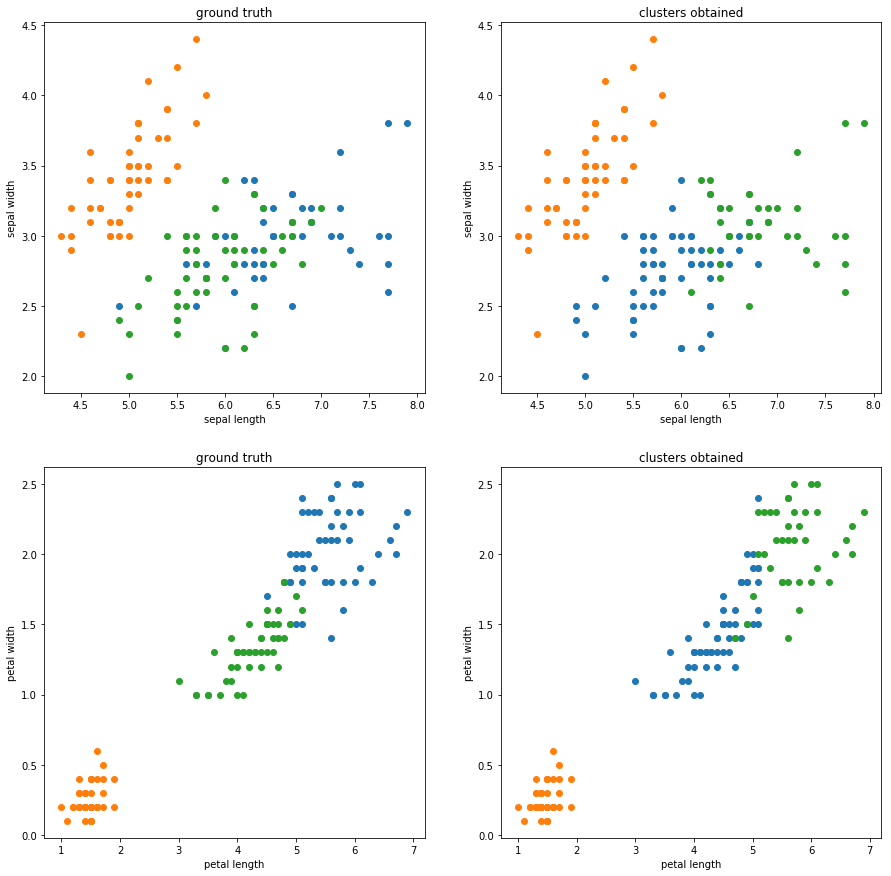

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(x[0,y==2],x[1,y==2],'o',x[0,y==0],x[1,y==0],'o', x[0,y==1],x[1,y==1],'o')
plt.title("ground truth")
plt.xlabel("sepal length")
plt.ylabel("sepal width")


plt.subplot(2,2,2)
plt.plot(x[0,dist_min_index==2],x[1,dist_min_index==2],'o',x[0,dist_min_index==1],x[1,dist_min_index==1],'o',x[0,dist_min_index==0],x[1,dist_min_index==0],'o')
plt.title("clusters obtained")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

plt.subplot(2,2,3)
plt.plot(x[2,y==2],x[3,y==2],'o',x[2,y==0],x[3,y==0],'o', x[2,y==1],x[3,y==1],'o')
plt.title("ground truth")
plt.xlabel("petal length")
plt.ylabel("petal width")


plt.subplot(2,2,4)
plt.plot(x[2,dist_min_index==2],x[3,dist_min_index==2],'o',x[2,dist_min_index==1],x[3,dist_min_index==1],'o',x[2,dist_min_index==0],x[3,dist_min_index==0],'o')
plt.title("clusters obtained")
plt.xlabel("petal length")
plt.ylabel("petal width")


plt.show()

# as these are the clusters , the colors of the clusters in the graphs may not be in order